# Policing Data Exercise

In [ ]:
from IPython.display import Image
import os
%matplotlib inline

* pandas, numpy 패키지 불러오세요~

In [ ]:
import pandas as pd
import numpy as np

* Q) police 파일 불러들이기

In [5]:
data = pd.read_csv("C:/Users/1-13/Downloads/police.csv")

In [6]:
data.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
data.tail()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91740,2015-12-31,22:46,NaN,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


* Q) 데이터 셋의 앞/뒤를 확인하시오

In [8]:
data.shape
# 총데이터수, 유형

(91741, 15)

In [9]:
data.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

* Q) 데이터셋의 모양을 확인하시오. 그리고 그 셋의 의미는?  
 Q) 데이터 셋의 각 컬럼에서 들어온 데이터들의 타입을 확인하시오!!!  
  이유 : 그냥 파일을 우선은 읽었으니, 제대로 원하는 형태로 들어왔는지, 아니면 nan이나 이상치 떄문에 제대로 변형이 되었는지 확인!!!!

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86406 non-null object
driver_age_raw        86414 non-null float64
driver_age            86120 non-null float64
driver_race           86408 non-null object
violation_raw         86408 non-null object
violation             86408 non-null object
search_conducted      91741 non-null bool
search_type           3196 non-null object
stop_outcome          86408 non-null object
is_arrested           86408 non-null object
stop_duration         86408 non-null object
drugs_related_stop    91741 non-null bool
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+ MB


In [11]:
data.isnull().sum()/len(data)*100 
# 빵구난애들의 개수 / 비율

stop_date               0.000000
stop_time               0.000000
county_name           100.000000
driver_gender           5.815284
driver_age_raw          5.806564
driver_age              6.127032
driver_race             5.813104
violation_raw           5.813104
violation               5.813104
search_conducted        0.000000
search_type            96.516280
stop_outcome            5.813104
is_arrested             5.813104
stop_duration           5.813104
drugs_related_stop      0.000000
dtype: float64

In [12]:
data.notnull().sum()/len(data)*100 

stop_date             100.000000
stop_time             100.000000
county_name             0.000000
driver_gender          94.184716
driver_age_raw         94.193436
driver_age             93.872968
driver_race            94.186896
violation_raw          94.186896
violation              94.186896
search_conducted      100.000000
search_type             3.483720
stop_outcome           94.186896
is_arrested            94.186896
stop_duration          94.186896
drugs_related_stop    100.000000
dtype: float64

* 이상한 데이터, nan 등이 있는데 어떻게 하면 효과적으로 확인을 할까???;;;  
아이디어 : 그럼 각 컬럼이나 전체에서 isnull. notnull등을 확인하면 될 것 같은데,,,   
문제는 각 컬럼에서 이러한 이상한 데이터가 얼마나 발생했는지 한 번에 확인하기 위해서는??????

* 위의 수치에서 이상한 점을 발견을 하였는가? 

In [13]:
data.drop(["county_name"],axis="columns",inplace=True)

In [14]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [15]:
data["search_type"].value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonab

In [16]:
data["search_conducted"].value_counts()
# 가설 : 서치 안한것이 반영된것이다.

False    88545
True      3196
Name: search_conducted, dtype: int64

* 위에서 발견한 이상한 컬럼을 제거하자!! 전체 컬럼이 너무 많은 상태이므로, 선택의 방식으로 취하는 것 보다는 drop이라는 방식이 좀 더 편할 것 같음!!!!!


In [17]:
len(data[data["search_conducted"]]["search_type"])

3196

* 실제 컬럼들을 확인하고, 원하던 컬럼이 지워졌는지 확인!

* search_type 역시 이상한 값이 상당히 많음;;;;

* search_conducted

* 위의 결과를 보고 든 생각은? --> 아마도 search_conducted 가 안 된 자료들이 search_type가 없는 것은 아닐까?  
그러면 위의 가설을 확인하는 방법은???

In [18]:
data[data.search_conducted==False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [19]:
data.violation_raw.unique()

array(['Speeding', 'Call for Service', 'Equipment/Inspection Violation',
       'Other Traffic Violation', nan, 'Registration Violation',
       'Special Detail/Directed Patrol', 'APB',
       'Violation of City/Town Ordinance', 'Suspicious Person',
       'Motorist Assist/Courtesy', 'Warrant', 'Seatbelt Violation'],
      dtype=object)

In [20]:
data[data.violation_raw=="Speeding"].driver_gender.value_counts()/len(data[data.violation_raw=="Speeding"].driver_gender)*100


M    68.049852
F    31.946021
Name: driver_gender, dtype: float64

In [21]:
data[data.violation_raw=="Speeding"].driver_gender.value_counts(normalize=True)


M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

* 데이터에서 남자/여자 중에서 누가 더 속도위반이 많은가???   
--> 우선 속도위반의 종류를 확인하기 위해서는 어느 컬럼을 봐야하는가?  
--> 그리고 그 중에서 남자와 여자의 분포를 어떻게 알 수 있을까?

In [ ]:
# 해당 데이터에 대한 비율로 변환을 해보자!!!


* 위와 같은 작업을 loc를 사용해서 해보기!!!

In [22]:
data.loc[data.violation=="Speeding","driver_gender"].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [23]:
data.loc[data.driver_gender=="M","violation"].value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [24]:
data.loc[data.driver_gender=="F","violation"].value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

* 남성 운전자들의 위반 종류별로 분포에 대한 비율 확인해보자.   
그리고 여성 운전자들의 위반 종류별로 분포에 대한 비율 확인해보자.

* 위의 결과를 따로 보지 말고, groupby를 이용해서 한 번에 볼 수 없을까?   
--> 무엇을 기준으로 묶은 후에, 무엇을 보고 싶은가를 판단!!!

In [25]:
data.loc[data.driver_gender=="F","violation"].value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [ ]:
data.groupby("driver_gender").violation.value_counts(normalize=True)

In [26]:
data.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [27]:
data["frisk"] = data.search_type == "Protective Frisk"
data["frisk"].value_counts()

False    91580
True       161
Name: frisk, dtype: int64

* 경찰들에 의해서 수색을 당한 유형별로 확인

* 수색 중에서 몸 수색을 당한 경우에 대해서 자세히 보자!  
이 경우에는 따로 확인을 하기 위해서 "frisk"라는 컬럼을 하나 만들어보기로 하자!

In [ ]:
# search_type중에서 protective frisk만 選擇


In [ ]:
# 위의 정보들을 바탕으로 원하는 컬럼에 값을 대입할 것!!


* 주의!!!) string_mathcing을 사용할 떄에는 주의가 필요!!!

In [28]:
#  유사검색을 한다;;;
data["frisk_2"] = data["search_type"].str.contains("Protective Frisk")

In [29]:
data["frisk_2"].value_counts()

False    2922
True      274
Name: frisk_2, dtype: int64

* 왜 다를까?;;;;;;;그러면 어떻게 해야할까?;;;

In [30]:
data["search_type"].value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [31]:
# 오차 원인이 되는 것 확인!!!!
col_1 = "Protective Frisk"  # 161
col_2 = "Probable Cause,Protective Frisk" # 33
col_3 = "Incident to Arrest,Protective Frisk" # 33
col_4 = "Protective Frisk,Reasonable Suspicion" # 11
col_5 = "Incident to Arrest,Inventory,Protective Frisk" # 11
col_6 = "Inventory,Protective Frisk" # 11
col_7 = "Inventory,Probable Cause,Protective Frisk"
col_8 = "Probable Cause,Protective Frisk,Reasonable Suspicion"
col_9 = "Incident to Arrest,Protective Frisk,Reasonable Suspicion"
col_10 = "Incident to Arrest,Probable Cause,Protective Frisk"
cols = [col_1, col_2, col_3, col_4, col_5, col_6, col_7, col_8, col_9, col_10]

data[data["search_type"].isin(cols)].shape
# 이러한 값들이 있습니까? 리턴 

(274, 16)

In [32]:
# 오차 원인이 되는 것 확인!!!!--> 확인 시 컬럼 이름에 대해서도 정확하게 해야함!! 
# 주의가 필요함!!!!!!!!!!
col_1 = "Protective Frisk "  # 161
col_2 = "Probable Cause,Protective Frisk " # 33
col_3 = "Incident to Arrest,Protective Frisk " # 33
col_4 = "Protective Frisk,Reasonable Suspicion " # 11
col_5 = "Incident to Arrest,Inventory,Protective Frisk " # 11
col_6 = "Inventory,Protective Frisk " # 11
col_7 = "Inventory,Probable Cause,Protective Frisk "
col_8 = "Probable Cause,Protective Frisk,Reasonable Suspicion "
col_9 = "Incident to Arrest,Protective Frisk,Reasonable Suspicion "
col_10 = "Incident to Arrest,Probable Cause,Protective Frisk "
cols = [col_1, col_2, col_3, col_4, col_5, col_6, col_7, col_8, col_9, col_10]

data[data["search_type"].isin(cols)].shape


(0, 16)

In [33]:
data.stop_date.str.slice(0,4)

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_date, Length: 91741, dtype: object

* 어느 연도가 제일 stop이 적었는가?

In [34]:
data["stop_year"] = data.stop_date.apply(lambda x : x[:4])


In [35]:
data["stop_year"].value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_year, dtype: int64

* 연도에 대한 컬럼을 새롭게 생성하시오, 물론 apply lambda를 사용해도 됨!!!   
stop_year 컬럼을 하나 생성을 해보세요!

In [36]:
data.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
frisk                    bool
frisk_2                object
stop_year              object
dtype: object

* 만든 컬럼의 type확인할 것!!

* 위의 것을 명확하게 datetime형식으로 변환하자!!!

In [37]:
data["stop_year"] = data["stop_date"].apply(lambda x :pd.to_datetime(str(x)[0:4]))
data.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                           bool
frisk_2                       object
stop_year             datetime64[ns]
dtype: object

In [38]:
data["stop_year"].value_counts()

2012-01-01    10970
2006-01-01    10639
2007-01-01     9476
2014-01-01     9228
2008-01-01     8752
2015-01-01     8599
2011-01-01     8126
2013-01-01     7924
2009-01-01     7908
2010-01-01     7561
2005-01-01     2558
Name: stop_year, dtype: int64

* 아무런 옵션을 하지 않으니 01-01로 설정이 되었음;;; 이것에 대한 수정을 해보자!!!!

In [39]:
data["stop_year2"] = data["stop_date"].apply(lambda x :pd.to_datetime(str(x)[0:4]).year)
data["stop_year2"] 

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_year2, Length: 91741, dtype: int64

In [40]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,frisk_2,stop_year,stop_year2
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,False,NaN,2005-01-01,2005
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005


In [41]:
data["stop_datetime"] = data.stop_date+" "+data.stop_time
data.stop_datetime.apply(lambda x : pd.to_datetime(x))

0       2005-01-02 01:55:00
1       2005-01-18 08:15:00
2       2005-01-23 23:15:00
3       2005-02-20 17:15:00
4       2005-03-14 10:00:00
                ...        
91736   2015-12-31 20:27:00
91737   2015-12-31 20:35:00
91738   2015-12-31 20:45:00
91739   2015-12-31 21:42:00
91740   2015-12-31 22:46:00
Name: stop_datetime, Length: 91741, dtype: datetime64[ns]

In [42]:
data["stop_datetime"] = data[["stop_date","stop_time"]].apply(lambda x : pd.to_datetime(str(x[0])+" "+str(x[1])),axis=1)

* 위의 방식들을 활용해서 stop_datetime이라고 해서,기존의  stop_date/ stop_time을 합치고, pandas의 datetime형식으로 변환하자.

In [ ]:
data["stop_datetime"] = ~~~

* 연도별 데이터의 수를 bar 그래프로 보자  --> 상당히 연도별로 특히 2005년 데이터가 불균형임을 확인!!!

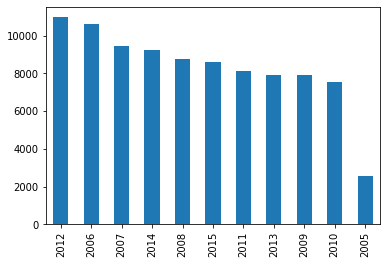

In [43]:
data["stop_datetime"].dt.year.value_counts().plot(kind = "bar")

0        01:55:00
1        08:15:00
2        23:15:00
3        17:15:00
4        10:00:00
           ...   
91736    20:27:00
91737    20:35:00
91738    20:45:00
91739    21:42:00
91740    22:46:00
Name: stop_datetime, Length: 91741, dtype: object

In [44]:
# pandas의 datetime을 활용하면 시간 관련해서는 좀 더 펴나게 할 수 있음. 컬럼 생성 없음!!!!!


* drugs_related_stop 관련 사항이 시간대별로 어떻게 변화했는지 알아보자!!!


In [178]:
data[data["drugs_related_stop"]==True]["stop_datetime"].dt.hour.value_counts()

0     103
23     92
1      60
13     50
22     47
2      46
14     44
9      43
10     42
11     41
15     31
19     30
20     27
16     22
18     22
3      20
21     20
12     16
17     16
7      15
8      14
6      10
4       3
5       1
Name: stop_datetime, dtype: int64

In [182]:
data.stop_datetime.dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

In [186]:
data.groupby(data["stop_datetime"].dt.hour)["drugs_related_stop"].sum()

stop_datetime
0     103.0
1      60.0
2      46.0
3      20.0
4       3.0
5       1.0
6      10.0
7      15.0
8      14.0
9      43.0
10     42.0
11     41.0
12     16.0
13     50.0
14     44.0
15     31.0
16     22.0
17     16.0
18     22.0
19     30.0
20     27.0
21     20.0
22     47.0
23     92.0
Name: drugs_related_stop, dtype: float64

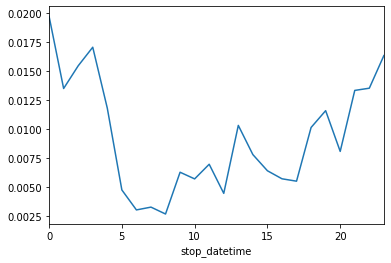

In [171]:
data.groupby(data["stop_datetime"].dt.hour)["drugs_related_stop"].mean().plot()


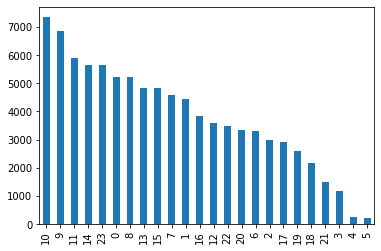

In [99]:
data["stop_datetime"].dt.hour.value_counts().plot(kind="bar")

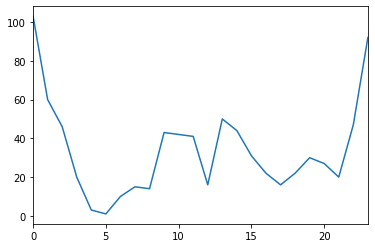

In [166]:
data[data.drugs_related_stop==True]["stop_datetime"].dt.hour.value_counts().sort_index().plot()

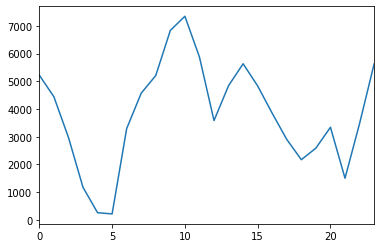

In [104]:
data["stop_datetime"].dt.hour.value_counts().sort_index().plot()

In [114]:
data.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [129]:
data.loc[(data.stop_duration == "1")|(data.stop_duration == "2"),"stop_duration"] = np.nan

In [134]:
data.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [135]:
data["stop_duration"].replace(["1","2"], value=np.nan, inplace=True)
# 리플레이스 사용하여 nan으로 바꿔줌

In [ ]:
# 우선 데이터의 종류가 어찌 되었는지 확인!


In [ ]:
# 시계열 정보를 잘 활용하기 위해서...stop_year_datetime 에서 활용

In [136]:
data["stop_datetime"][3]

Timestamp('2005-02-20 17:15:00')

In [137]:
data["stop_datetime"].dt.hour[3]

17

In [138]:
data["stop_datetime"].dt.minute[3]

15

In [139]:
data["stop_datetime"].dt.second[3]

0

In [140]:
mapping = {"0-15 Min":8,"16-30 Min":23,"30+ Min":45}

In [146]:
data["stop_avg_min"]=data["stop_duration"].map(mapping)

In [147]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,frisk_2,stop_year,stop_year2,stop_datetime,stop_avg_min
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005,2005-01-02 01:55:00,8.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005,2005-01-18 08:15:00,8.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005,2005-01-23 23:15:00,8.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,False,NaN,2005-01-01,2005,2005-02-20 17:15:00,23.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005,2005-03-14 10:00:00,8.0


In [ ]:
# 새별 시간대에 많고, 아침 시간대에 적고, 점심 시간대에 잠시 증가했다가 저녁 이후로 증가 하는 현상이....

* 그냥 시간대별로 확인해보자.

* 시간대 별로 정렬

* stop_duration 컬럼 값을 보자

* 이상한 값이 있으니, 이것을 찾아서 NaN으로 수정하자!!!!  
주의!!) 그냥 nan을 사용하면 안 되고, 앞에서 한 np의 것으로 활용!!!!

In [ ]:
# 또 다른 방식
data["stop_duration"].replace(["1","2"], value=np.nan, inplace=True)

* 각 위반사항별로 평균 stop시간을 계산해보자!!!   
---> 문제는 stop_duration이 정확한 시간이 아니니 매핑을 해줘야함.  
---> stop_avg_min생성하여 추가

In [ ]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [ ]:
data["stop_avg_min"] = data["stop_duration"].map(mapping)

In [ ]:
data.head()

In [187]:
data["stop_avg_min"].value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_avg_min, dtype: int64

* 아래 그림과 같은 테이블을 완성하시오 [violation_raw별로 보기], groupby

In [194]:
data.violation_raw.value_counts()

Speeding                            48463
Other Traffic Violation             16224
Equipment/Inspection Violation      11020
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Call for Service                     1298
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              203
APB                                    79
Suspicious Person                      56
Warrant                                15
Name: violation_raw, dtype: int64

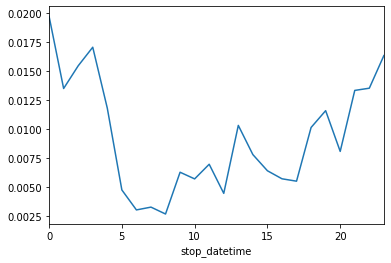

In [195]:
data.groupby(data["stop_datetime"].dt.hour)["drugs_related_stop"].mean().plot()

In [206]:
data.groupby("violation_raw")["stop_avg_min"].agg(["mean","count"])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


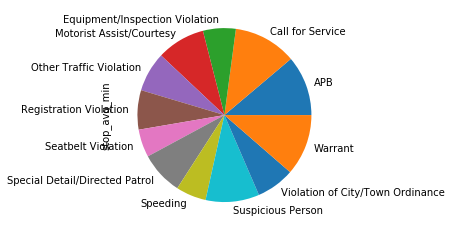

In [212]:
data.groupby("violation_raw")["stop_avg_min"].mean().plot(kind="pie")

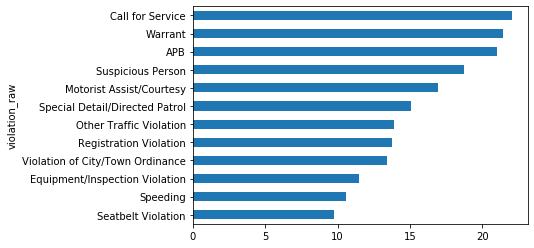

In [213]:
data.groupby("violation_raw")["stop_avg_min"].mean().sort_values().plot(kind="barh")

In [193]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,frisk_2,stop_year,stop_year2,stop_datetime,stop_avg_min
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005,2005-01-02 01:55:00,8.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005,2005-01-18 08:15:00,8.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005,2005-01-23 23:15:00,8.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,False,NaN,2005-01-01,2005,2005-02-20 17:15:00,23.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False,NaN,2005-01-01,2005,2005-03-14 10:00:00,8.0


* 위의 결과를 그래프로

* 각 위반별로 나이대를 알아보자

In [214]:
data.groupby("violation")["driver_age"].describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


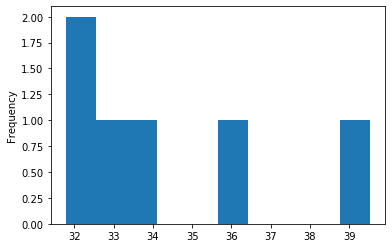

In [227]:
data.groupby("violation")["driver_age"].mean().plot(kind="hist")

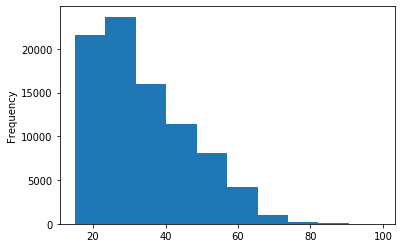

In [228]:
data["driver_age"].plot(kind='hist')


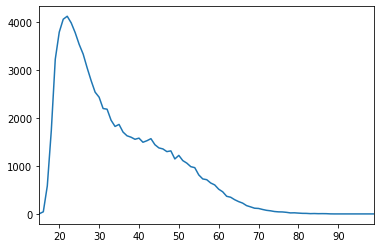

In [232]:
data.driver_age.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182565C8388>,
      dtype=object)

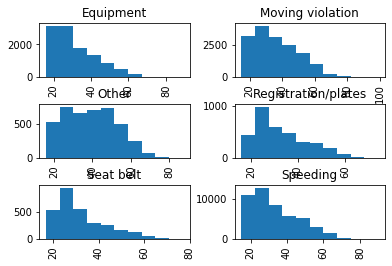

In [236]:
data.hist("driver_age",by="violation")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001825ECAA0C8>,
      dtype=object)

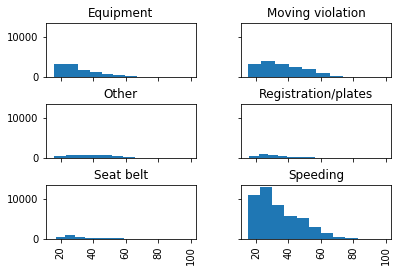

In [241]:
data.hist("driver_age",by="violation",sharex=True,sharey=True)

In [251]:
data.groupby("driver_age")